In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow_datasets as tfds

In [2]:
# tfds.load returns a tf.data.Dataset object and a tf.core.DatasetInfo object. The latter contains info about how the set is split 
# into test and train, number of examples and names of features
dataset, metadata = tfds.load('cifar100', as_supervised=True, with_info=True) 
train_dataset, test_dataset = dataset['train'], dataset['test']

In [3]:
# Size of training and test sets
train_size = metadata.splits['train'].num_examples
test_size = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(train_size))
print("Number of test examples:     {}".format(test_size))
# Normalise data
def minmaxScaling(images, labels):
    images = tf.cast(images, tf.float32)
    images = images/255
    return images, labels

train_dataset = train_dataset.map(minmaxScaling)
test_dataset = test_dataset.map(minmaxScaling)

Number of training examples: 50000
Number of test examples:     10000


In [4]:
# Human readable labels for the classes
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm']
 
len(class_names)

100

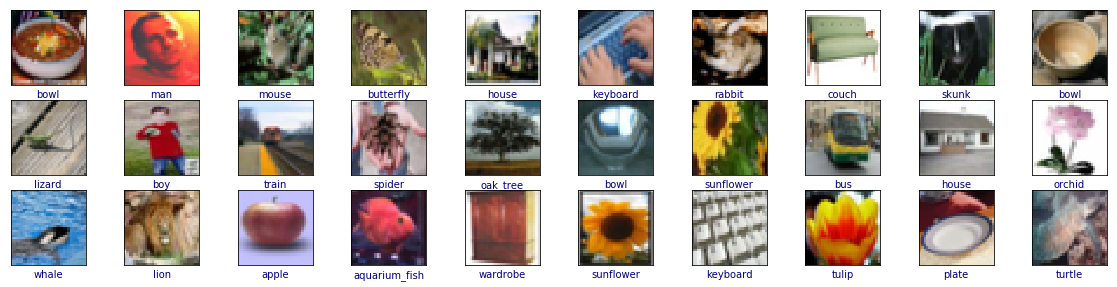

In [5]:
# Print examples
plt.figure(figsize=(20,8))
i = 0
for (image, label) in test_dataset.take(30):
    image = image.numpy().reshape((32,32,3))
    plt.subplot(5,10,i+1)
    plt.imshow(image)#, cmap= plt.cm.binary)
    plt.xlabel(class_names[label], color="navy")
    plt.xticks([])
    plt.yticks([])
    i += 1
plt.show()

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', 
                           input_shape=(32,32,3), data_format='channels_last', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2, padding='same'),
    tf.keras.layers.Dropout(0,4),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', 
                           data_format='channels_last', activation ='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2, padding='same'),
    tf.keras.layers.Dropout(0,4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=100, activation=('softmax'))
])
# Compile model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer = 'adam',
              metrics=['accuracy'])

In [7]:
# Shuffling and splitting of training set 
BATCH_SIZE = 32
train_dataset_batched = train_dataset.repeat().shuffle(train_size).batch(BATCH_SIZE)

In [8]:
# Training model
trained=model.fit(train_dataset_batched, epochs=10, verbose=True, steps_per_epoch=np.ceil(train_size/BATCH_SIZE))

Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


1563/1563 [==============================] - 354s 227ms/step - loss: 3.4685 - accuracy: 0.1832
Epoch 2/10
1563/1563 [==============================] - 368s 235ms/step - loss: 2.6243 - accuracy: 0.3410
Epoch 3/10
1563/1563 [==============================] - 357s 228ms/step - loss: 2.2178 - accuracy: 0.4270
Epoch 4/10
1563/1563 [==============================] - 361s 231ms/step - loss: 1.9229 - accuracy: 0.4947
Epoch 5/10
1563/1563 [==============================] - 390s 250ms/step - loss: 1.6571 - accuracy: 0.5568
Epoch 6/10
1563/1563 [==============================] - 418s 267ms/step - loss: 1.4037 - accuracy: 0.6144
Epoch 7/10
1563/1563 [==============================] - 405s 259ms/step - loss: 1.1745 - accuracy: 0.6764
Epoch 8/10
1563/1563 [==============================] - 390s 250ms/step - loss: 0.9819 - accuracy: 0.7256
Epoch 9/10
1563/1563 [==============================] - 413s 264ms/step - loss: 0.7958 - accuracy: 0.7734
Epoch 10/10
1563/1563 [==============================] - 

In [12]:
# Performance on test set
test_loss, test_acc = model.evaluate(test_dataset.batch(BATCH_SIZE), steps=np.ceil(test_size/BATCH_SIZE))

313/313 [==============================] - 24s 78ms/step - loss: 3.9849 - accuracy: 0.3604


In [13]:
#Predictions
test_predictions = model.predict(test_dataset.batch(BATCH_SIZE))
#train_predictions = model.predict(train_dataset.batch(BATCH_SIZE), steps=np.ceil(train_size/BATCH_SIZE))

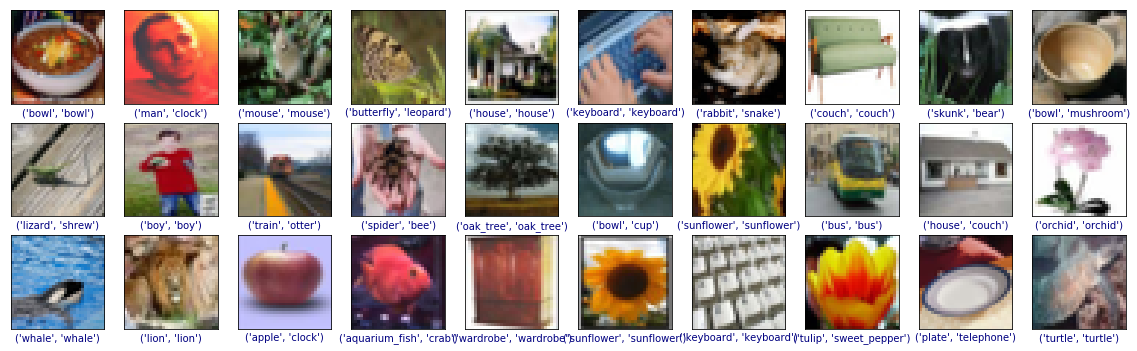

In [19]:
# Print example and its predicted class
plt.figure(figsize=(20,10))
i = 0
for (image, label) in test_dataset.take(30):
    image = image.numpy().reshape((32,32,3))
    plt.subplot(5,10,i+1)
    plt.imshow(image, cmap= plt.cm.binary)
    plt.xlabel((class_names[label], 
                class_names[test_predictions[i].argmax()]), color='navy')
    plt.xticks([])
    plt.yticks([])
    i += 1
plt.show()